<a href="https://colab.research.google.com/github/nupursjsu/Advanced-Deep-Learning/blob/master/Ancient_Serve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 130, 256)          145408    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 130, 128)          164352    
_________________________________________________________________
lstm_2 (LSTM)                (None, 130, 64)           49408     
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 64)                8256      
_________________________________________________________________
dense (Dense)                (None, 128)               8320      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2

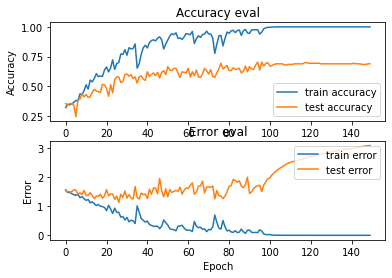

11/11 - 0s - loss: 3.0023 - accuracy: 0.6810

Test accuracy: 0.681034505367279


In [2]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt


DATA_PATH = "/content/drive/MyDrive/Raga_Data/data_10.json"


def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
      data = json.load(fp)
    data['labels']=data['labels']
    data['mapping']=data['mapping']
    data['mfcc']=data['mfcc']

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.

    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    """Generates RNN-LSTM model

    :param input_shape (tuple): Shape of input set
    :return model: RNN-LSTM model
    """

    # build network topology
    model = keras.Sequential()

    # 2 LSTM layers
    # model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=True), input_shape=input_shape))
    model.add(keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True)))
    model.add(keras.layers.LSTM(64,return_sequences=True))
    model.add(keras.layers.SimpleRNN(64))


    # dense layer
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(32, activation='relu'))
    model.add(keras.layers.Dropout(0.1))

    # output layer
    model.add(keras.layers.Dense(5, activation='softmax'))

    return model


if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2]) # 130, 13
    model = build_model(input_shape)

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=150
                        )

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

In [3]:
model.save('my_model')

INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


In [4]:
!zip -r example.zip '/content/my_model'

  adding: content/my_model/ (stored 0%)
  adding: content/my_model/assets/ (stored 0%)
  adding: content/my_model/variables/ (stored 0%)
  adding: content/my_model/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: content/my_model/variables/variables.index (deflated 72%)
  adding: content/my_model/saved_model.pb (deflated 89%)


In [ ]:
data_path="/content/drive/MyDrive/Final_MFCC_data.json"

In [6]:
with open('/content/drive/MyDrive/Raga_Data/data_10.json', "r") as fp:
        data = json.load(fp)

In [7]:
data['mapping']

['De╠äs╠ü',
 'Bhairavi',
 'Bila╠äsakha╠äni╠ä to╠äd╠úi╠ä',
 'Ba╠äge╠äs╠üri╠ä',
 'Ahira bhairav']

In [8]:
set(data['labels'])

{0, 1, 2, 3, 4}

In [ ]:
import zipfile
with zipfile.ZipFile('/content/example.zip', 'r') as zip_ref:
    zip_ref.extractall('model')

In [ ]:
import keras


In [9]:
model=keras.models.load_model('/content/my_model')

In [10]:
# Fetch the Keras session and save the model
# The signature definition is defined by the input and output tensors,
# and stored with the default serving key
import tempfile
import os
import tensorflow as tf

# os.mkdir('model_folder')
# MODEL_DIR='model_folder'
MODEL_DIR = tempfile.gettempdir()
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

print('\nSaved model:')
!ls -l {export_path}

export_path = /tmp/1



INFO:tensorflow:Assets written to: /tmp/1/assets


INFO:tensorflow:Assets written to: /tmp/1/assets



Saved model:
total 5960
drwxr-xr-x 2 root root    4096 Mar 30 20:45 assets
-rw-r--r-- 1 root root 6094315 Mar 30 20:45 saved_model.pb
drwxr-xr-x 2 root root    4096 Mar 30 20:45 variables


In [11]:
!saved_model_cli show --dir {export_path} --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['bidirectional_input'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 130, 13)
        name: serving_default_bidirectional_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense_3'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 5)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict
W0330 20:45:44.962210 140518755342208 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorfl

In [12]:
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  16081      0 --:--:-- --:--:-- --:--:-- 16170
OK
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,012 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hi

In [13]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 36 not upgraded.
Need to get 223 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.4.1 [223 MB]
Fetched 223 MB in 3s (76.1 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 160980 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.4.1_all.deb ...
Unpacking tensorflow-model-server (2.4.1) ...
Setting up tensorflow-model-server (2.4.1) ...


In [14]:
!apt-get upgrade tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tensorflow-model-server is already the newest version (2.4.1).
Calculating upgrade... Done
The following packages have been kept back:
  libcudnn8 libcudnn8-dev libnccl-dev libnccl2
The following packages will be upgraded:
  binutils binutils-common binutils-x86-64-linux-gnu cuda-compat-11-0 gnupg2
  libaudit-common libaudit1 libbinutils libc-bin libcublas-dev libcublas10
  libcudnn7 libcudnn7-dev libldap-2.4-2 libldap-common libp11-kit0 libperl5.26
  libsasl2-2 libsasl2-modules-db libssl-dev libssl1.1 libzstd1 linux-libc-dev
  openssl perl perl-base perl-modules-5.26 r-cran-callr r-cran-cpp11
  r-cran-gert r-cran-vctrs tar
32 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
Need to get 465 MB of archives.
After this operation, 70.0 MB of additional disk space will be used.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  cuda-compat-11-0 450.102.

In [15]:
os.environ["MODEL_DIR"] = MODEL_DIR

In [16]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=8502 \
  --model_name=saved_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1


Starting job # 0 in a separate thread.


In [17]:
!tail server.log

2021-03-30 20:48:07.769153: I tensorflow_serving/model_servers/server.cc:88] Building single TensorFlow model file config:  model_name: saved_model model_base_path: /tmp
2021-03-30 20:48:07.769479: I tensorflow_serving/model_servers/server_core.cc:464] Adding/updating models.
2021-03-30 20:48:07.769518: I tensorflow_serving/model_servers/server_core.cc:587]  (Re-)adding model: saved_model


In [18]:
import librosa
signal, sample_rate = librosa.load('/content/Hirabai Barodekar - Laagi Mori Bindiya.mp3')
mfcc = librosa.feature.mfcc(signal)
mfcc = mfcc.T


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [1]:
import librosa
import numpy as np
import json
import requests

In [4]:
def predict_raga(fp):

    y, sr = librosa.load(fp,res_type='kaiser_best')
    mfcc = librosa.feature.mfcc(y=y, sr=22050, hop_length=512, n_mfcc=13)
    mfcc=mfcc.T

    data = {
            "mfcc": []
        }
    data["mfcc"].append(mfcc.tolist())

    X = np.array(data["mfcc"])

    data = json.dumps({"signature_name": "serving_default", "instances": X.tolist()})
    print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

    headers = {"content-type": "application/json"}
    json_response = requests.post('http://34.72.124.124:8501/v1/models/classify_raga:predict', data=data, headers=headers)

    predictions = json.loads(json_response.text)['predictions']
    class_names = ['De╠äs╠ü',
    'Bhairavi',
    'Bila╠äsakha╠äni╠ä to╠äd╠úi╠ä',
    'Ba╠äge╠äs╠üri╠ä',
    'Ahira bhairav']

    print(class_names[np.argmax(predictions)])

In [ ]:
path='/content/drive/MyDrive/UnZippedRaagas/RagaDatasetNew/Ahira bhairav/'
import os

_, _, filenames = next(os.walk(path))

In [ ]:
# for f in filenames:
#   predict_raga(path+f)

In [6]:
predict_raga('/content/Hirabai Barodekar - Laagi Mori Bindiya.mp3')

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Data: {"signature_name": "serving_default", "instances": ... 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]]}
Bhairavi


In [27]:
import shutil
shutil.make_archive('classify_raga', 'zip', MODEL_DIR)

'/content/classify_raga.zip'

In [28]:
import shutil
shutil.make_archive('logs', 'zip', '/content/logs')

FileNotFoundError: ignored